# Confusion Matrix by Pandas

In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
df_val = read_csv('my_predictions_val.csv')

In [3]:
#COST Matrix
PL0_0 = 500    #TN
PL1_0 = -2500  #FN
PL0_1 = -500   #FP
PL1_1 = 0      #TP

#Precison
P = 100

In [4]:
def CalculError_seuil2 (row):
    v = row['SeriousDlqin2yrs']
    w = row['1 probability']
    s1 = row['seuil']
    if v == 0 :
        if w < s1 :
            return 'TN'
        else :
            return 'FP'
    else :
        if w < s1 :
            return 'FN'
        else :
            return 'TP'

In [5]:
def calcul_gain (s,PL0_0,PL0_1,PL1_0,PL1_1,option): 
    df_val['seuil'] = s
    df_val['error']= df_val.apply (CalculError_seuil2, axis = 1)
    resultat = df_val.groupby('error')['field1'].nunique()
    df_matrixConfusion = pd.DataFrame({'Prediction 0' : [resultat[2],resultat[0]], 'Prediction 1':[resultat[1],resultat[3]]},index = ['Actual 0', 'Actual 1'] )
    df_matrixCost = pd.DataFrame({'Prediction 0' : [PL0_0,PL1_0], 'Prediction 1':[PL0_1, PL1_1]},index = ['Actual 0', 'Actual 1'] )
    total_gain = df_matrixCost * df_matrixConfusion
    total_gain2 = total_gain.sum (axis = 1)
    total_gain3 = total_gain2.sum (axis = 0)
    
    switcher={
                1: resultat,
                2: df_matrixConfusion,
                3: df_matrixCost,
                4: total_gain3
            }
    return switcher.get(option,"Invalid option")
    


**** Pour un seuil = 0.5 ****
error
FN     1686
FP      236
TN    27749
TP      329
Name: field1, dtype: int64

** Matrice de confusion
          Prediction 0  Prediction 1
Actual 0         27749           236
Actual 1          1686           329

** Matrice de cout
          Prediction 0  Prediction 1
Actual 0           500          -500
Actual 1         -2500             0

 => Le P&L est de 9541500 au seuil de 0.5

**** Simulation ****
=> Le P&L maximum est de 9989500 au seuil de 0.29


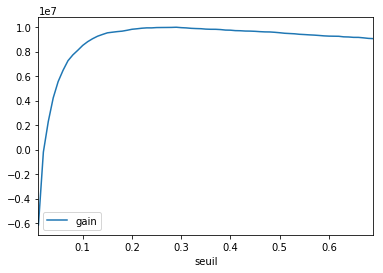

In [6]:
#df_val.info()

res = calcul_gain (0.5,PL0_0,PL0_1,PL1_0,PL1_1,1)
mtxcf = calcul_gain (0.5,PL0_0,PL0_1,PL1_0,PL1_1,2)
mtxct = calcul_gain (0.5,PL0_0,PL0_1,PL1_0,PL1_1,3)
pl05 = calcul_gain (0.5,PL0_0,PL0_1,PL1_0,PL1_1,4)

print()
print ('**** Pour un seuil = 0.5 ****')
print (res)
print()
print ('** Matrice de confusion')
print (mtxcf)
print()
print ('** Matrice de cout')
print (mtxct)
print()
print (f' => Le P&L est de {pl05} au seuil de 0.5')

print()
print ('**** Simulation ****')

dfx = pd.concat([pd.DataFrame({ 'seuil': [i/P],
                                'gain' : [calcul_gain(i/P,PL0_0,PL0_1,PL1_0,PL1_1,4)]}) 
                                 for i in range (1,int(7*P/10))], ignore_index=True)

dfx_max = dfx[dfx['gain'] == dfx['gain'].max()]
idx_max = dfx_max.index[0]
seuil_max = dfx_max.at[idx_max,'seuil']
gain_max = dfx_max.at[idx_max,'gain']
print (f'=> Le P&L maximum est de {gain_max} au seuil de {seuil_max}')
dfx.plot(x='seuil' , y='gain')